(1, 1, 0.0)


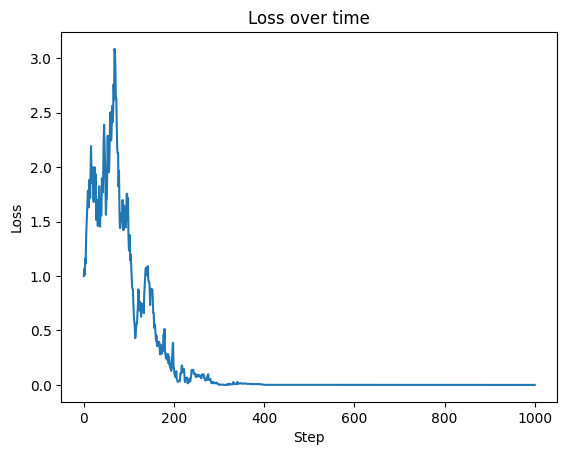

In [5]:
from Problem import RF
from algorithms import SimulatedAnnealing as SA
from algorithms import PSO as PSO
import numpy as np
import matplotlib.pyplot as  plt

a = RF(1,1.5)

test = SA(func=a, step_size=0.1, mode="min", seed=42)

x, fx, his = test.optimize((0,0), return_history=True)

print(a.global_minimum())


his = np.array(his)
plt.plot(a.loss(a(his[:,0], his[:,1])))

plt.xlabel("Step")
plt.ylabel("Loss")
plt.title("Loss over time")
plt.show()


# Test PSO trên Rosenbrock Function

Sử dụng PSO để tìm minimum của Rosenbrock Function

In [ ]:
# Khởi tạo Rosenbrock Function
rf = RF(a=1, b=1.5)

def fitness_function(position):
    """
    Fitness function cho PSO (cao hơn là tốt hơn)
    Vì PSO maximize fitness, nên ta đảo dấu hàm RF
    """
    x, y = position[0], position[1]
    value = rf(x, y)
    # Đảo dấu để tối đa hóa = tối thiểu hóa RF
    return -value

# Định nghĩa không gian tìm kiếm (bounds)
# Tìm kiếm xung quanh global minimum
bounds = [(-2, 4), (-1, 5)]  # x từ -2 đến 4, y từ -1 đến 5

# Khởi tạo PSO
pso = PSO(
    num_particles=30,      # 30 particles
    num_iter=100,          # 100 iterations
    num_dimensions=2,      # 2D (x, y)
    bounds=bounds,
    compute_fitness=fitness_function,
    particle_type='continuous',
    w=0.7,                 # Inertia weight
    c1=1.5,                # Cognitive parameter
    c2=1.5,                # Social parameter
    w_decay=0.99           # Decay của inertia weight
)

print("🐦 Running PSO on Rosenbrock Function...")
print(f"   Search space: x ∈ [{bounds[0][0]}, {bounds[0][1]}], y ∈ [{bounds[1][0]}, {bounds[1][1]}]")
print(f"   Global minimum: {rf.global_minimum()}\n")

# Chạy PSO
best_position, best_fitness = pso.run(verbose=True)

# Hiển thị kết quả
x_opt, y_opt = best_position
value_opt = rf(x_opt, y_opt)
x_true, y_true, f_true = rf.global_minimum()

print("\n" + "="*60)
print("📊 KẾT QUẢ PSO")
print("="*60)
print(f"✅ Best position found: ({x_opt:.6f}, {y_opt:.6f})")
print(f"   Function value: {value_opt:.6f}")
print(f"\n🎯 True global minimum: ({x_true:.6f}, {y_true:.6f})")
print(f"   True minimum value: {f_true:.6f}")
print(f"\n📏 Error: {abs(value_opt - f_true):.6f}")
print(f"   Distance to optimum: {np.sqrt((x_opt - x_true)**2 + (y_opt - y_true)**2):.6f}")
print("="*60)

🐦 Running PSO on Rosenbrock Function...
   Search space: x ∈ [-2, 4], y ∈ [-1, 5]
   Global minimum: (1, 1, 0.0)

Iteration 1: best fitness = -0.0850
Iteration 2: best fitness = -0.0055
Iteration 3: best fitness = -0.0055
Iteration 4: best fitness = -0.0034
Iteration 5: best fitness = -0.0034
Iteration 6: best fitness = -0.0028
Iteration 7: best fitness = -0.0014
Iteration 8: best fitness = -0.0014
Iteration 9: best fitness = -0.0014
Iteration 10: best fitness = -0.0003
Iteration 11: best fitness = -0.0003
Iteration 12: best fitness = -0.0000
Iteration 13: best fitness = -0.0000
Iteration 14: best fitness = -0.0000
Iteration 15: best fitness = -0.0000
Iteration 16: best fitness = -0.0000
Iteration 17: best fitness = -0.0000
Iteration 18: best fitness = -0.0000
Iteration 19: best fitness = -0.0000
Iteration 20: best fitness = -0.0000
Iteration 21: best fitness = -0.0000
Iteration 22: best fitness = -0.0000
Iteration 23: best fitness = -0.0000
Iteration 24: best fitness = -0.0000
Iterati

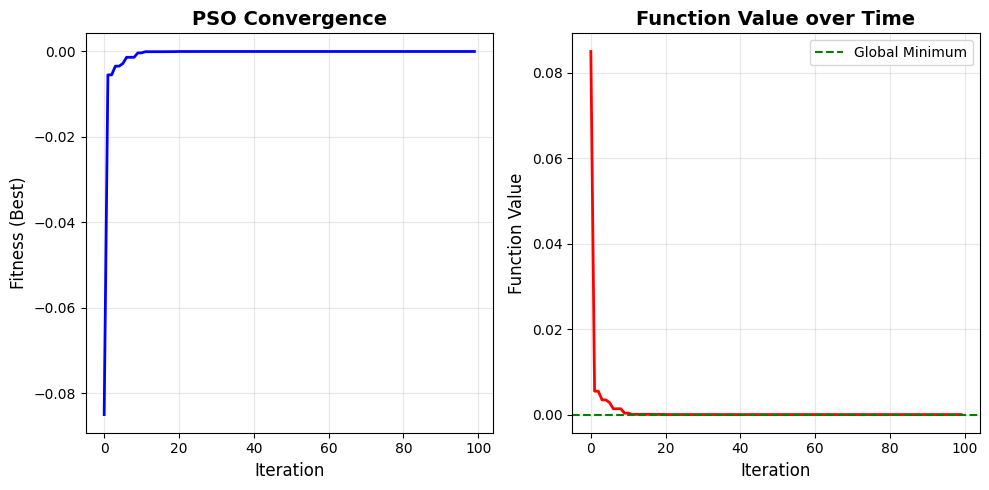

🔄 Final fitness: -0.000000
📉 Improvement: 0.085032


In [7]:
# Visualize fitness history của PSO
plt.figure(figsize=(10, 5))

# Plot fitness over iterations
plt.subplot(1, 2, 1)
plt.plot(pso.fitness_history, 'b-', linewidth=2)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Fitness (Best)', fontsize=12)
plt.title('PSO Convergence', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Plot function value over iterations
plt.subplot(1, 2, 2)
function_values = [-f for f in pso.fitness_history]  # Đảo lại dấu
plt.plot(function_values, 'r-', linewidth=2)
plt.axhline(y=f_true, color='g', linestyle='--', label='Global Minimum')
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Function Value', fontsize=12)
plt.title('Function Value over Time', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"🔄 Final fitness: {pso.fitness_history[-1]:.6f}")
print(f"📉 Improvement: {abs(pso.fitness_history[-1] - pso.fitness_history[0]):.6f}")

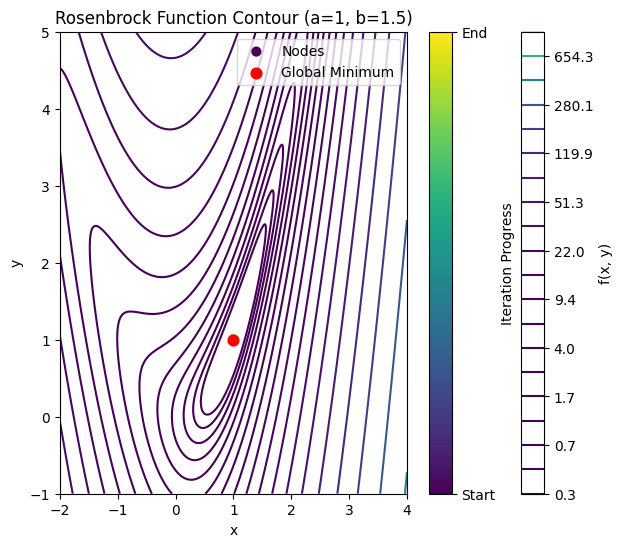


🎨 Visualization hiển thị:
   - Đỏ: Global minimum thực
   - Xanh dương: Vị trí các particles sau khi chạy PSO
   - 30 particles được hiển thị


In [8]:
# Visualize trên contour plot của Rosenbrock Function
# Lấy vị trí của tất cả particles qua các iteration
all_positions = []
for particle in pso.particles:
    if hasattr(particle, 'position'):
        all_positions.append(particle.position)

all_positions = np.array(all_positions)

# Vẽ contour với vị trí các particles
rf.visualize(
    xlim=bounds[0],
    ylim=bounds[1],
    resolution=400,
    three_d=False,
    points=all_positions,
    gradient_color=True
)

print(f"\n🎨 Visualization hiển thị:")
print(f"   - Đỏ: Global minimum thực")
print(f"   - Xanh dương: Vị trí các particles sau khi chạy PSO")
print(f"   - {len(all_positions)} particles được hiển thị")

# So sánh PSO vs Simulated Annealing

So sánh hiệu suất của PSO và SA trên cùng một bài toán

In [9]:
# So sánh PSO và Simulated Annealing
print("="*60)
print("🔥 SO SÁNH PSO vs SIMULATED ANNEALING")
print("="*60)

# Chạy lại Simulated Annealing
sa_test = SA(func=rf, step_size=0.1, mode="min", seed=42)
sa_x, sa_fx, sa_his = sa_test.optimize((0, 0), return_history=True)

print("\n📊 Kết quả Simulated Annealing:")
print(f"   Best position: ({sa_x[0]:.6f}, {sa_x[1]:.6f})")
print(f"   Function value: {sa_fx:.6f}")
print(f"   Number of steps: {len(sa_his)}")

print("\n📊 Kết quả PSO:")
print(f"   Best position: ({x_opt:.6f}, {y_opt:.6f})")
print(f"   Function value: {value_opt:.6f}")
print(f"   Number of iterations: {len(pso.fitness_history)}")

print("\n🏆 So sánh:")
print(f"   SA Error: {abs(sa_fx - f_true):.6f}")
print(f"   PSO Error: {abs(value_opt - f_true):.6f}")

if abs(value_opt - f_true) < abs(sa_fx - f_true):
    print(f"   ✅ PSO tốt hơn (error thấp hơn {abs(sa_fx - value_opt):.6f})")
else:
    print(f"   ✅ SA tốt hơn (error thấp hơn {abs(value_opt - sa_fx):.6f})")

print("="*60)

🔥 SO SÁNH PSO vs SIMULATED ANNEALING

📊 Kết quả Simulated Annealing:
   Best position: (0.997314, 0.997807)
   Function value: 0.000022
   Number of steps: 1001

📊 Kết quả PSO:
   Best position: (1.000000, 1.000000)
   Function value: 0.000000
   Number of iterations: 100

🏆 So sánh:
   SA Error: 0.000022
   PSO Error: 0.000000
   ✅ PSO tốt hơn (error thấp hơn 0.000022)
